In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="white")

In [2]:
df = pd.read_csv("sim.csv",
                  names=["label", "sigma", "avg_utilization", "avg_welfare", "incentive", "fairness", "avg_fairness"])
df.head()

,label,sigma,avg_utilization,avg_welfare,incentive,fairness,avg_fairness
0,static,0,0.737732,0.738073,0.0,0.984844,0.500195
1,maxmin,0,0.975751,0.976190,0.0,0.995945,0.903580
2,karma,0,0.975735,0.976211,0.0,0.973429,0.542660
3,mpsp,0,0.975751,0.718531,0.0,0.889717,0.803003
4,sharp,0,0.975751,0.976188,0.0,0.995570,0.619688


### Utilization

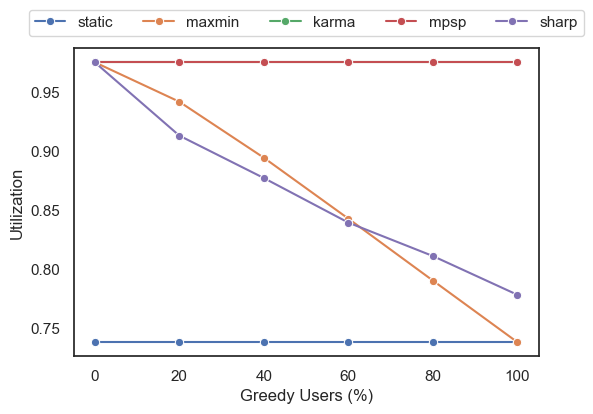

In [3]:
plt.figure(figsize=(6, 4))
sns.lineplot(x="sigma", y="avg_utilization", hue="label", data=df, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Utilization")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.savefig("utilization.png", bbox_inches="tight")
plt.show()

### Welfare

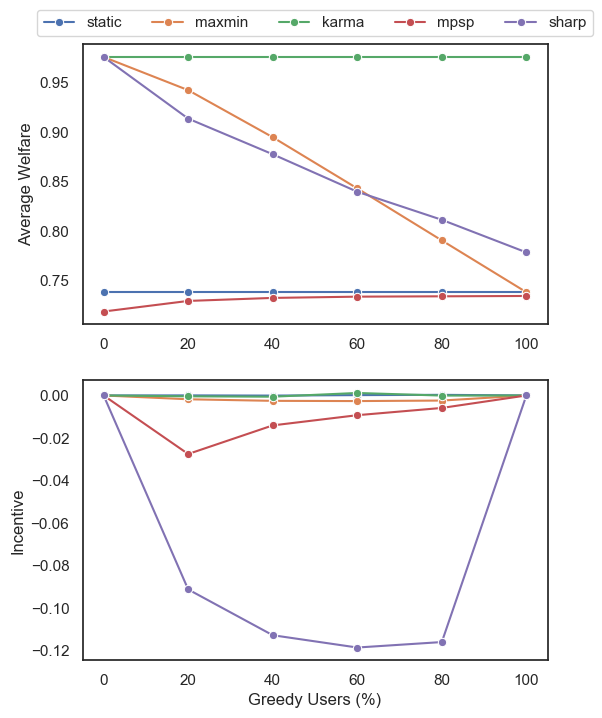

In [4]:
plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
sns.lineplot(x="sigma", y="avg_welfare", hue="label", data=df, marker="o")
plt.xlabel("")
plt.ylabel("Average Welfare")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.subplot(2, 1, 2)
sns.lineplot(x="sigma", y="incentive", hue="label", data=df, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Incentive")
plt.legend([], frameon=False)

plt.savefig("welfare.png", bbox_inches="tight")
plt.show()

### Fairness

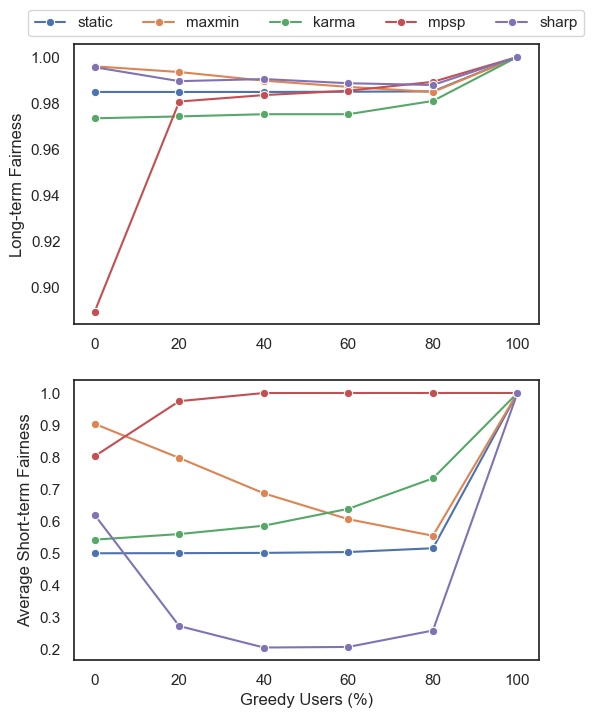

In [5]:
plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
sns.lineplot(x="sigma", y="fairness", hue="label", data=df, marker="o")
plt.xlabel("")
plt.ylabel("Long-term Fairness")
plt.legend(title=None, bbox_to_anchor=(0.5, 1.15), loc="upper center", ncol=5)

plt.subplot(2, 1, 2)
sns.lineplot(x="sigma", y="avg_fairness", hue="label", data=df, marker="o")
plt.xlabel("Greedy Users (%)")
plt.ylabel("Average Short-term Fairness")
plt.legend([], frameon=False)

plt.savefig("fairness.png", bbox_inches="tight")
plt.show()